In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing modules or packages for linear Regression.

# Train & Test data split
from sklearn.model_selection import train_test_split

#Feture scaling
from sklearn.preprocessing import StandardScaler

# Statsmodel linear regression
import statsmodels.api as sm

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Retrieving the Data
    - Loading "CarPrice_Assignment.csv"

In [3]:
car_data = pd.read_csv("./CarPrice_Assignment.csv")

# Glimpse of Data
- How many Rows and Columns
- Getting the names of the Columns of Car Data
- Checking missing values and removal of unwanted columns
- Removing duplicates if any

In [4]:
car_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### How many Rows and Columns

In [5]:
car_data.shape

(205, 26)

### Getting the names of the Columns of Car Data

In [6]:
car_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Checking missing values and removal of unwanted columns

In [8]:
#Identifying Missing data. Already verified above. To be sure again checking.
total_null = car_data.isnull().sum().sort_values(ascending = False)
percent = ((car_data.isnull().sum()/car_data.isnull().count())*100).sort_values(ascending = False)
print("Total records (Car Data) = ", car_data.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(5)


Total records (Car Data) =  205


,Total Missing,In Percent
price,0,0.0
highwaympg,0,0.0
symboling,0,0.0
CarName,0,0.0
fueltype,0,0.0


### Removal of duplicates and columns which are not useful

In [9]:
# Dropping Duplicates if any
car_data=car_data.drop_duplicates()
car_data.shape

# No duplicates found.

(205, 26)

In [10]:
# dropping car_ID as it is just for reference and no use.
car_data = car_data.drop('car_ID',axis=1)
car_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Data quality check or Cleaning the data
- Data Type validation 
- Format
- Misspelling
- Uniqueness
- Misfield values
- Invalid values etc...


### Data Type validation

In [11]:
#To check Data Type validation.  
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [12]:
# Based on the given dictionary with the data set, Symboling is the Categorical value
# but in data set, it was consiedred as Numeric value.
# Converting from Numeric to Categorical variable type
# Let's convert the symboling variable.
# Here Symboling is the assigned insurance risk rating,A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

# Let's make the category clear by classifying based on risk
#       -2,-1 symboling as Safe
#        0, 1 as Low Risk
#        2,3 as High Risk
car_data["symboling"] = car_data["symboling"].map({-2: 'Safe',-1: 'Safe',0: 'Low Risk',1: 'Low Risk',2: 'High Risk',3:'High Risk'})
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg     

In [13]:
car_data.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,High Risk,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,High Risk,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,Low Risk,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,High Risk,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,High Risk,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Understanding the Data or Data Visualization

- Extracting data (if required) - Spliting the Column like in current data we have Company Name and Make in a single column
- Identifying the outliners and skewness for dependent variables. (in our case it is price)
- Identifying the Key factors (independent variable) affecting the dependent variable
- Relation between Dependent variable with Numerical and Categorical variables


### Extracting data - Using CarName - extracting 'Company Name' and 'Make'

- Spliting the data
- Validating the data

In [14]:
# Extracting Car Company from the CarName
car_data['CompanyName'] = car_data['CarName'].str.split(' ',expand=True)[0]
car_data.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,High Risk,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,High Risk,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,Low Risk,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,High Risk,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,High Risk,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
# Dropping the car name column as it is no use.
car_data.drop(columns="CarName", inplace=True)

In [16]:
# Unique values in Company Name
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

### Correcting typo errors or spellings (Company Name):

- maxda = mazda
- Nissan = nissan
- porcshce = porsche
- toyouta = toyota
- vokswagen = vw = volkswagen

In [17]:
# correcting the typo errors in make values
car_data["CompanyName"] = car_data["CompanyName"].replace({"maxda":"mazda",
                                                           "Nissan":"nissan",
                                                           "porcshce":"porsche",
                                                           "toyouta":"toyota",
                                                           "vokswagen":"volkswagen",
                                                           "vw":"volkswagen"})
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,Low Risk,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,High Risk,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,High Risk,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [18]:
# Unique values in Company Name
car_data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Checking for outliners and Skewness of dependent variable

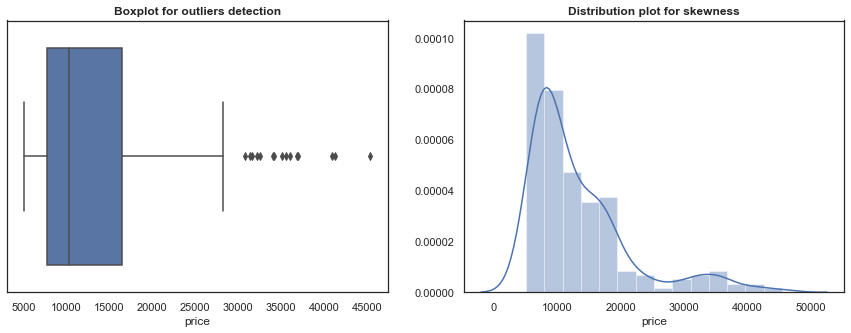

In [19]:
# Visualizing our dependent variable for Outliers and Skewness
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(car_data["price"])
plt.title("Boxplot for outliers detection", fontweight="bold")

plt.subplot(1,2,2)
sns.distplot(car_data["price"])
plt.title("Distribution plot for skewness", fontweight="bold")

plt.show()

In [20]:
print(car_data.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


# Inferences :

- Some car prices whose values are above 30k which can be termed as outliers but we will not remove them instead we will use **standarization scaling**.
- There is a significant difference between the mean and the median of the price distribution.
- The plot seemed to be **right-skewed**, meaning that the most prices in the dataset are low(Below 15,000).
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

***Let's see how the prices vary with the different automobile companies in the US market***

### Identifying the Key factors (independent variable) affecting the dependent variable

In [21]:
# creating list of numerical and categorical variables
col_numeric = list(car_data.select_dtypes(exclude="object"))
print(col_numeric)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [22]:
categorical_list = list(car_data.columns[car_data.dtypes == 'object'])
print(categorical_list)

['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CompanyName']


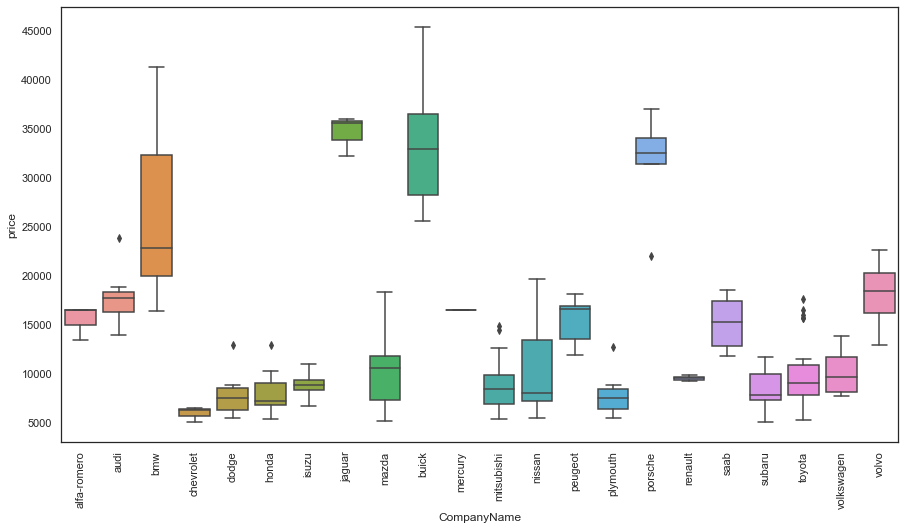

In [23]:
plt.figure(figsize=(15,8))
sns.boxplot(x = categorical_list[-1], y = 'price', data = car_data)
plt.xticks(rotation=90)
plt.show()


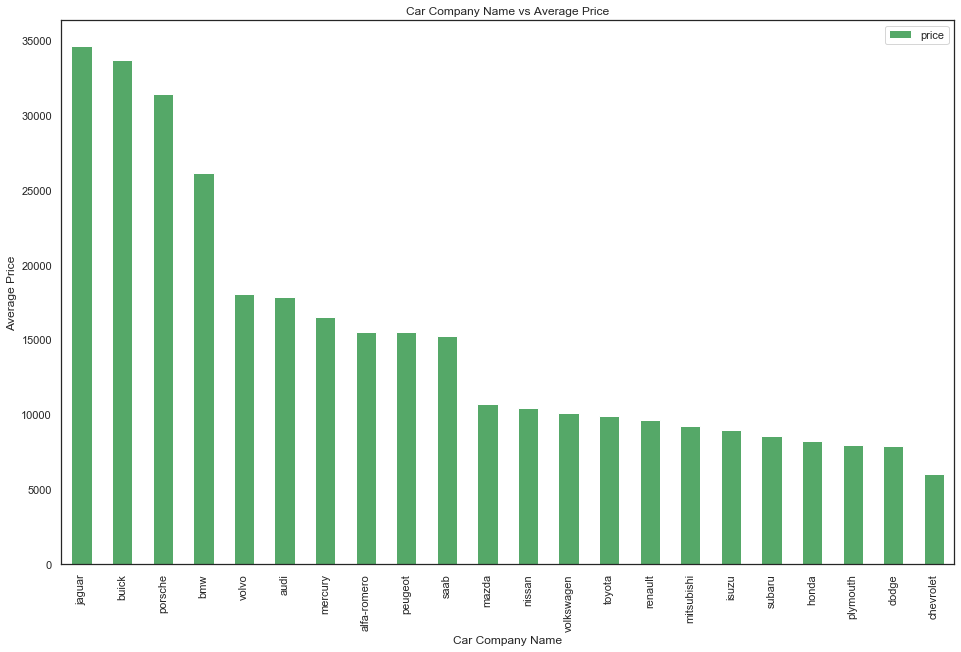

In [24]:
AvgPrice_Vs_CompanyName = pd.DataFrame(car_data.groupby('CompanyName').price.mean().sort_values(ascending=False))
AvgPrice_Vs_CompanyName.plot.bar(figsize=(16,10),facecolor='g')
plt.title('Car Company Name vs Average Price')
plt.ylabel('Average Price')
plt.xlabel('Car Company Name')
plt.show()

#print('Avg car price in US : ',car_data['price'].mean())
#print(car_data.groupby('CompanyName').price.mean().sort_values(ascending=False).head())
#print(car_data.groupby('CompanyName').price.mean().sort_values(ascending=True).head())

# Inferences 

- Companies are having there own price range for cars.
- There are few outliers for each company which shows that they do manufacture expensive cars which are priced above their price range.
- Some companies like like jaguar, Buick, Porsche, BMW are clearly manufacture expensive cars.(Above 13k)
- Car manufactures like chevrolet, dodge, plymouth, honda sell economical cars. (Below 13k)
- **Company name shows some affect on the price determination.** 


### Visualizing the Categorical variables

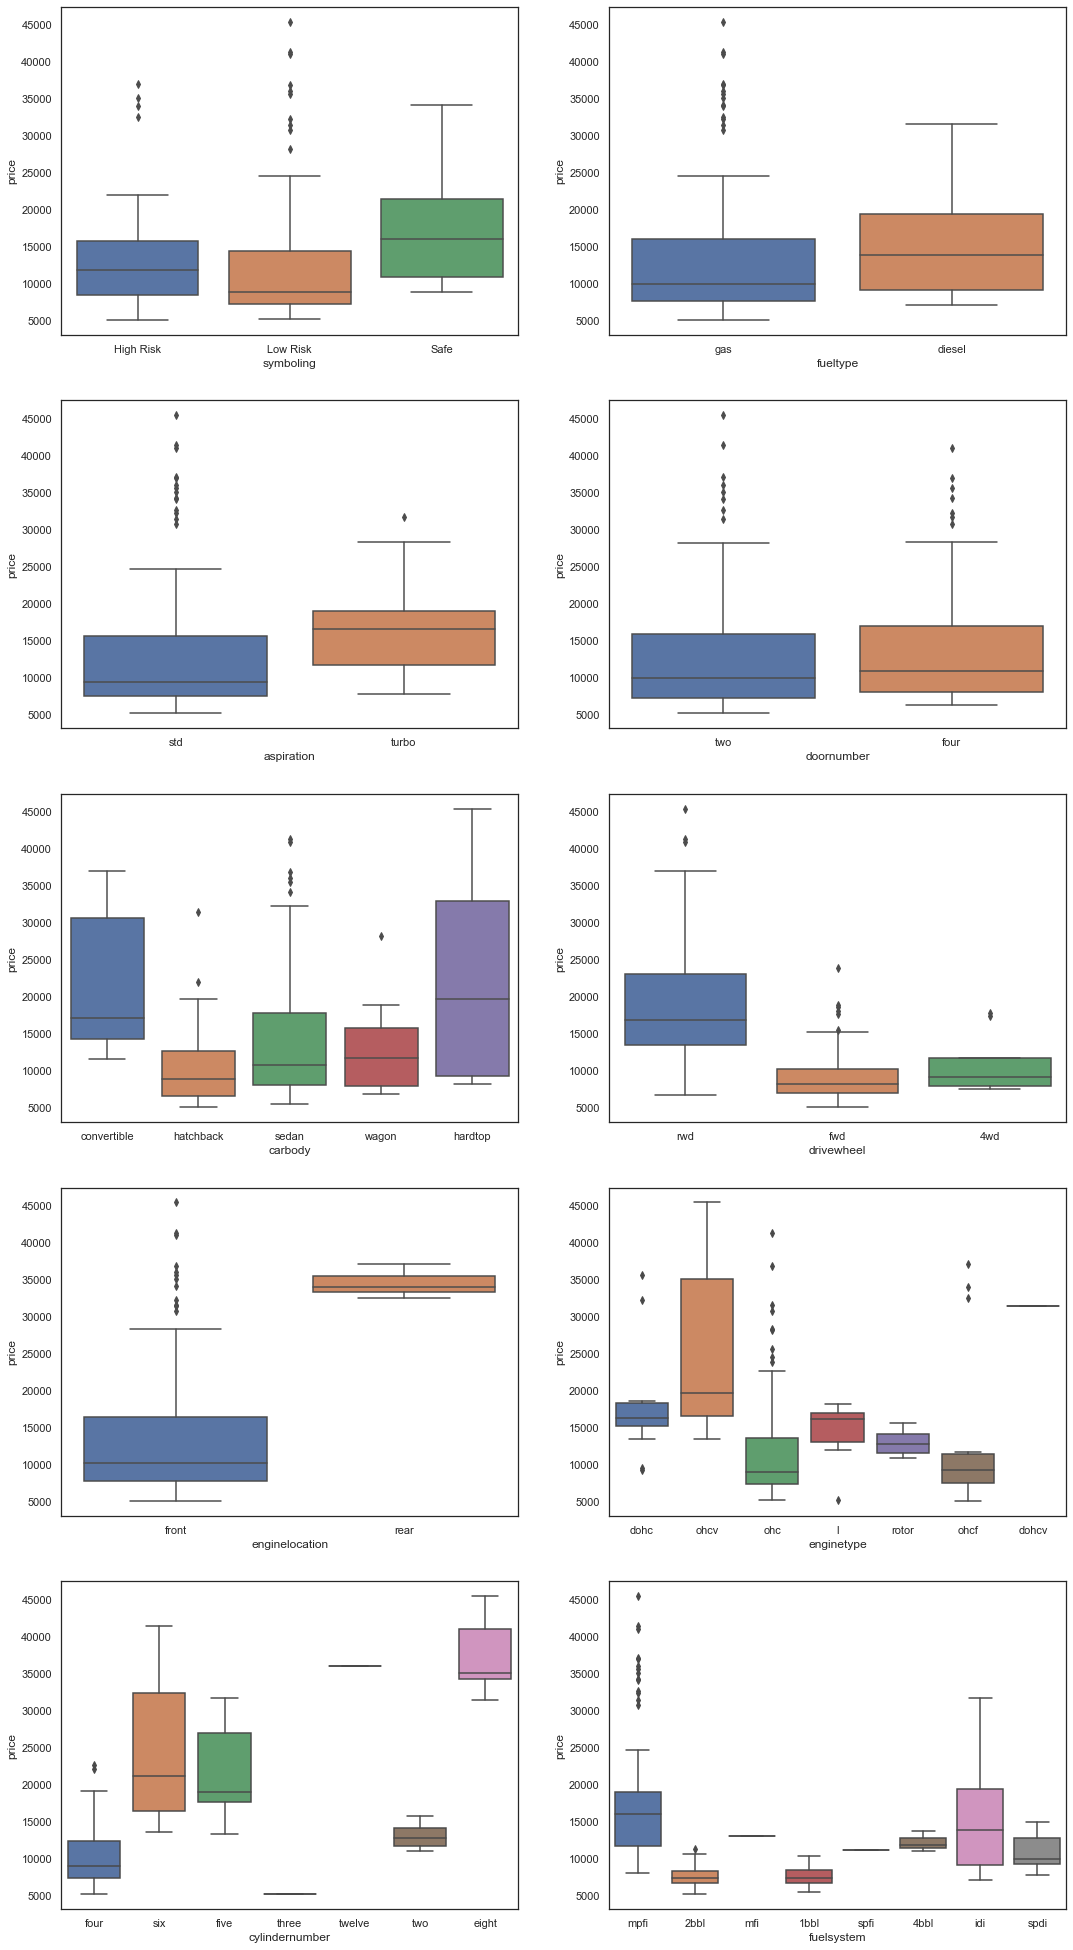

In [25]:
#Function to plot a list of categorical variables together
def box_plot(colname):
    plt.figure(figsize=(18, 35))
    for var in colname:
        plt.subplot(5,2,colname.index(var)+1)
        sns.boxplot(x = var, y = 'price', data = car_data)
    plt.show()
    
box_plot(categorical_list[:-1])

# Inferences

- Cars with **fueltype** as diesel are expensive as compare to fueltype as gas.
- Cars with ohcv **enginetype** are way expensive than cars with enginetype.
- Price of car is directly proporational to **no. of cylinders** in most cases.
- The price of real wheel drive is significantly higher that other **drivewheel** options
- **hardtop and convertables cars** are definetly priced higher than other **Carbody** types available.
- **doorNumber** isn't affecting the price much.

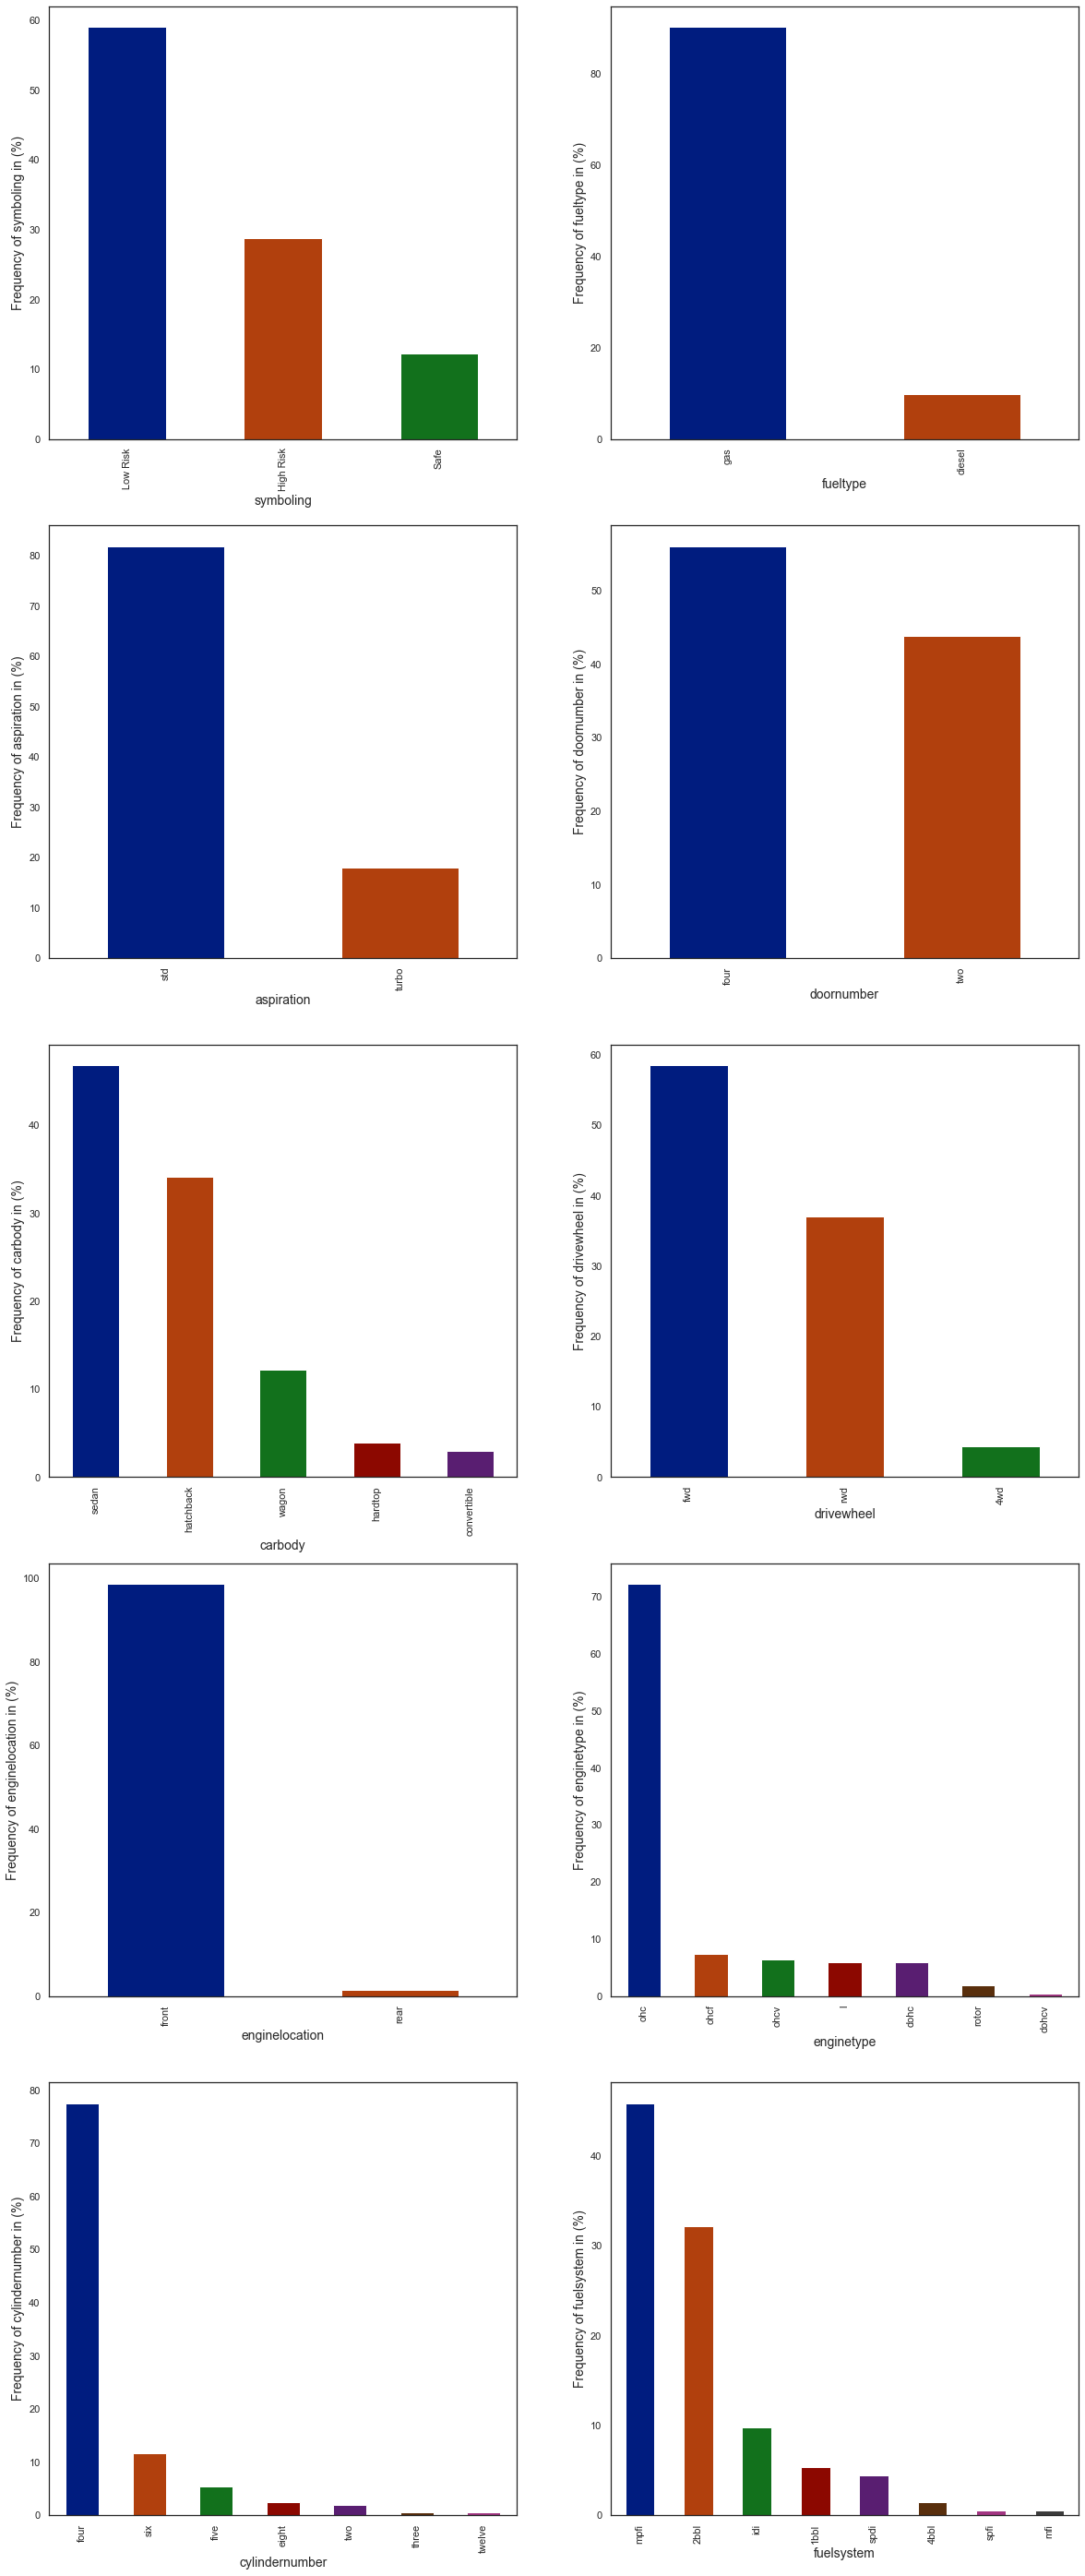

In [26]:
# Plot the percentage of cars w.r.t. different car features (categorical fields)
# Frequency of each cars feature in percentage.
def bar_plot_percentage(df, colnames, sortbyindex=False):
    plt.figure(figsize=(20, 50))
    #fig.subplots_adjust(hspace=0.5)
    string = "Frequency of "
    for colname in colnames:
        plt.subplot(5,2,colnames.index(colname)+1)
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette('dark'))
        plt.ylabel(string, fontsize=14)
        plt.xlabel(colname, fontsize=14)
        string = "Frequency of "
        
bar_plot_percentage(car_data,categorical_list[:-1])

# Inferences

- The **number of cylinders** in cars are mostly 4.
- **fuelType** - Gas fueled cars are more than diesel fueled cars.
- dhc is most common **engine type**.
- **enginelocation** - more than 90% of cars having front engine location
- Other features which are most common in a car are -
  1. **symboling** - Low Risk (0,1)
  2. **carbody** - Sedan
  3. **aspiration** - standard
  4. **doornumbers** - four
  5. **drivewheel** - forward
  6. **fuelSystem** - mpfi

### Visualizing the Numerical Variable (Independent variable)

In [27]:
print(col_numeric)

['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


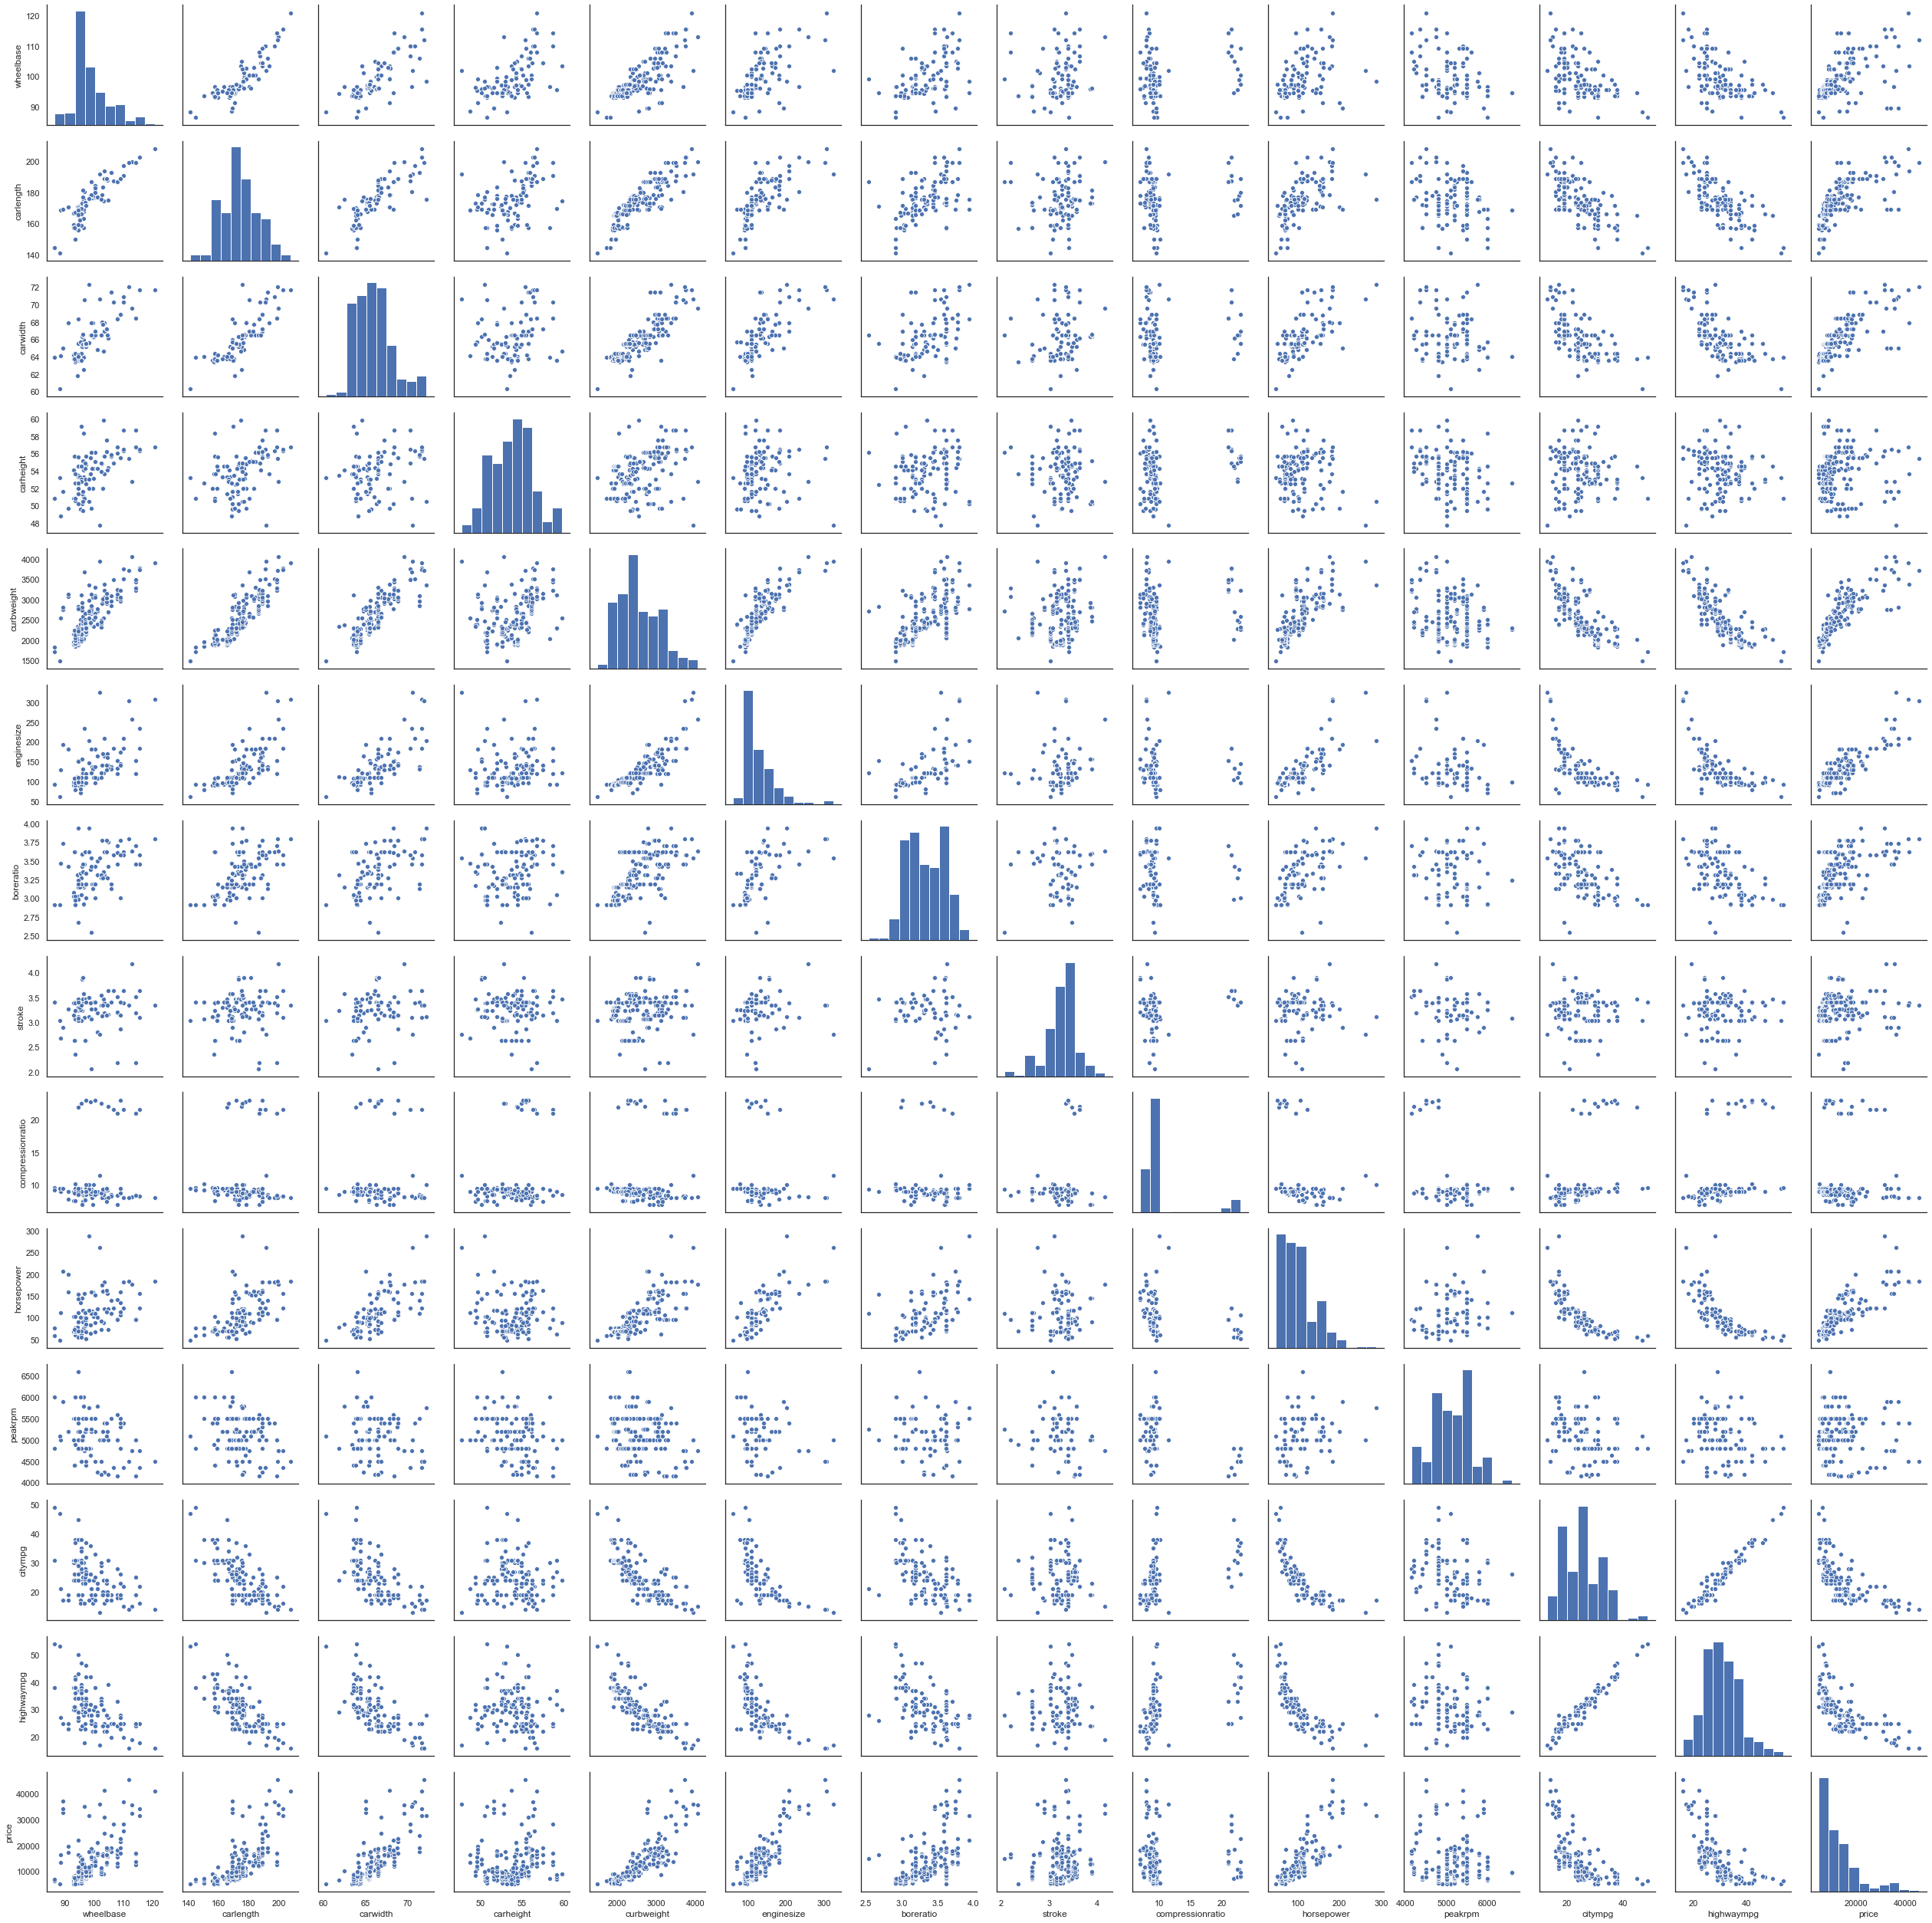

In [28]:
sns.pairplot(car_data[col_numeric])

In [29]:
#sns.pairplot(car_data[col_numeric],kind="reg")

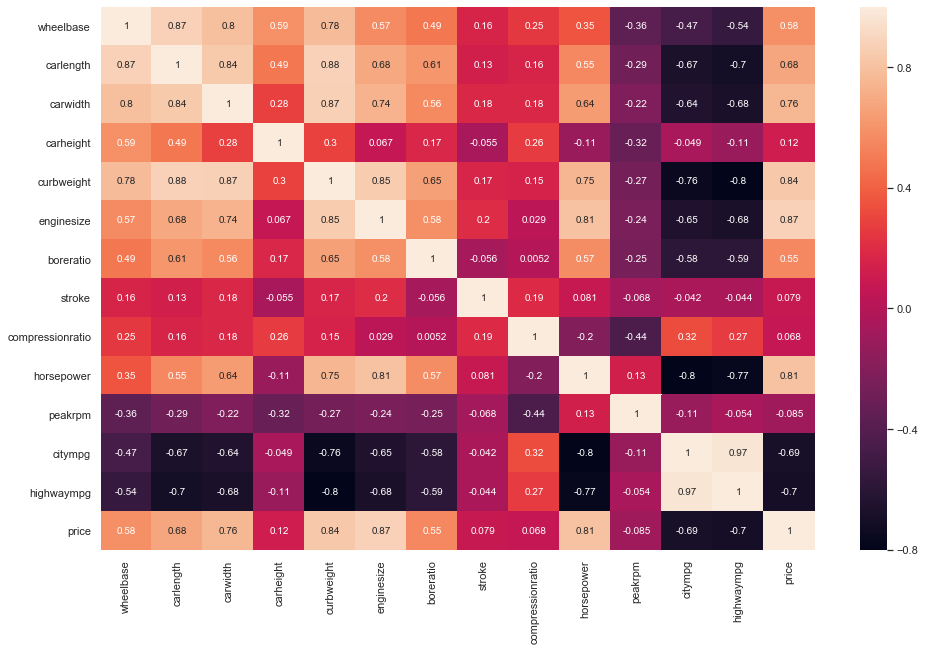

In [30]:
plt.figure(figsize = (16, 10))
sns.heatmap(car_data.corr(),annot=True)
plt.show()

## Inferences 

From above, we can identify features that might affecting price of car are -
1. enginesize
2. curbweight
3. horsepower
4. carwidth
5. citympg (Negative Correlation)
6. highwaympg (Negative Correlation)
7. carlength
8. wheelbase
9. boreratio

**We can already see some multicolinearity between the independent variables.**

### Lets have a close check on multicolienarity.


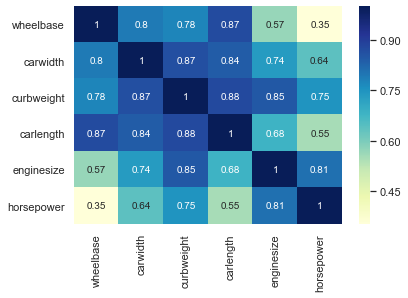

In [31]:
curr = car_data[['wheelbase', 'carwidth', 'curbweight','carlength','enginesize','horsepower']]
sns.heatmap(curr.corr(),annot=True,cmap="YlGnBu")
plt.show()

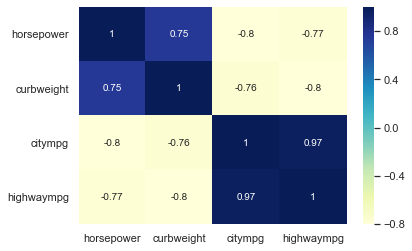

In [32]:
curr = car_data[['horsepower', 'curbweight', 'citympg','highwaympg']]
sns.heatmap(curr.corr(),annot=True,cmap="YlGnBu")
plt.show()


# Inferences

- **highwaympg** and **citympg** are highly correlated **(0.97)**. We should drop one of these.
- correlation factor between **curbweight** and with **enginesize, carlength, carwidth** is above **0.85**
- correlation between **carlength** with **wheelbase, carwidth, curbweight** is also above **0.84**.
- Strong **negative correlation** between **crubweight,horsepower** with **highwaympg ,citympg**

## Checking for outliers and Skewness of independent numerical variables

1. enginesize
2. curbweight
3. horsepower
4. carwidth
5. citympg (Negative Correlation)
6. highwaympg (Negative Correlation)
7. carlength
8. wheelbase
9. boreratio

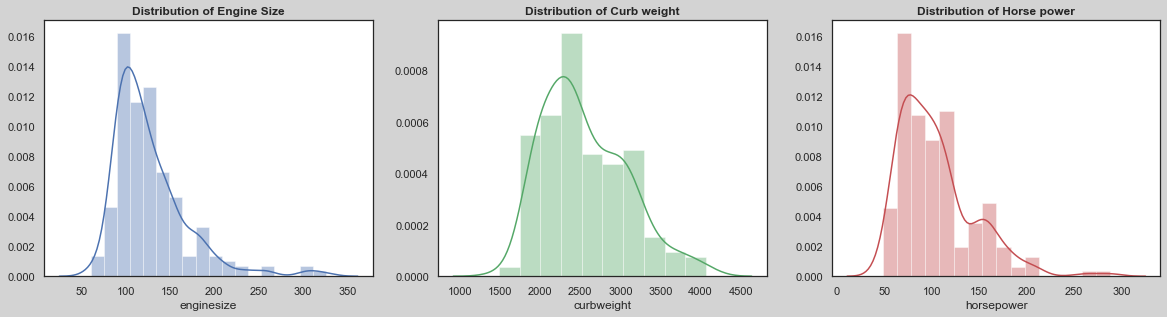

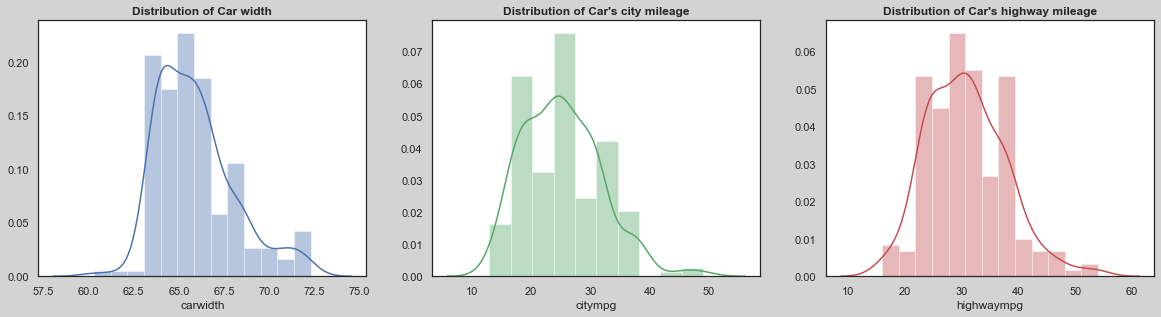

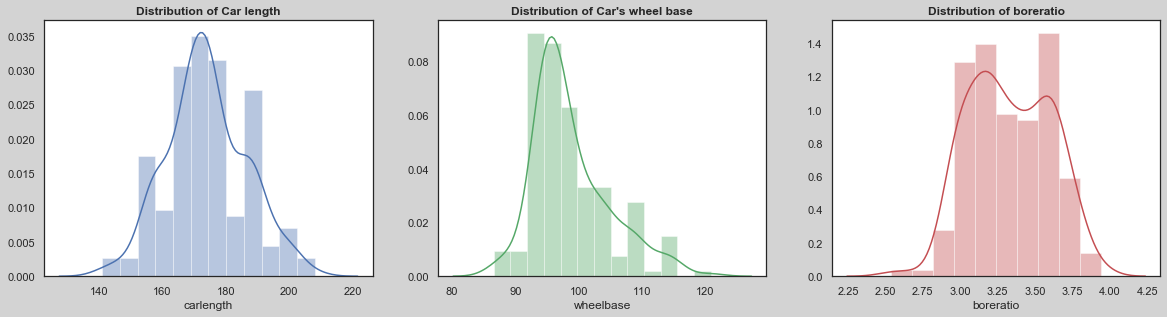

In [33]:
ax = plt.figure(figsize=(20,16))
ax.set_facecolor("lightgrey")

plt.subplot(3,3,1)
sns.distplot(car_data["enginesize"],color='b')
plt.title("Distribution of Engine Size", fontweight="bold")

plt.subplot(3,3,2)
sns.distplot(car_data["curbweight"],color='g')
plt.title("Distribution of Curb weight", fontweight="bold")

plt.subplot(3,3,3)
sns.distplot(car_data["horsepower"],color='r')
plt.title("Distribution of Horse power", fontweight="bold")

ax = plt.figure(figsize=(20,16))
ax.set_facecolor("lightgrey")

plt.subplot(3,3,1)
sns.distplot(car_data["carwidth"],color='b')
plt.title("Distribution of Car width", fontweight="bold")

plt.subplot(3,3,2)
sns.distplot(car_data["citympg"],color='g')
plt.title("Distribution of Car's city mileage", fontweight="bold")

plt.subplot(3,3,3)
sns.distplot(car_data["highwaympg"],color='r')
plt.title("Distribution of Car's highway mileage", fontweight="bold")

ax = plt.figure(figsize=(20,16))
ax.set_facecolor("lightgrey")

plt.subplot(3,3,1)
sns.distplot(car_data["carlength"],color='b')
plt.title("Distribution of Car length", fontweight="bold")

plt.subplot(3,3,2)
sns.distplot(car_data["wheelbase"],color='g')
plt.title("Distribution of Car's wheel base", fontweight="bold")

plt.subplot(3,3,3)
sns.distplot(car_data["boreratio"],color='r')
plt.title("Distribution of boreratio", fontweight="bold")

plt.show()



# Inferences

- We see enginesize, horsepower variable plot seemed to be right-skewed. Lets validate same using boxplot.

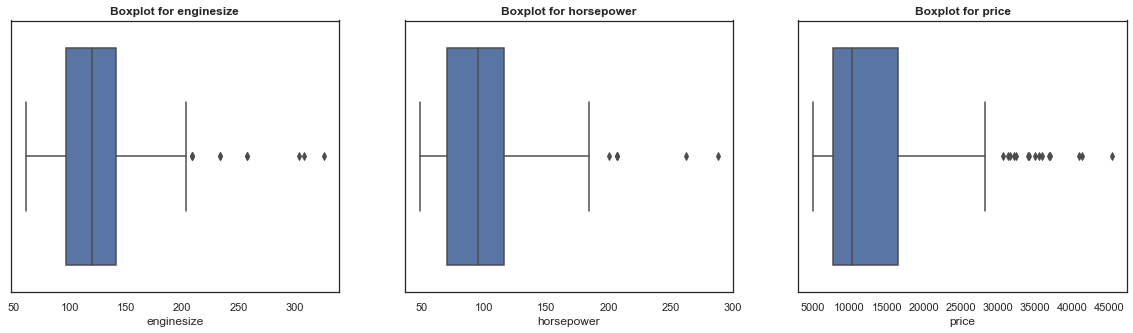

In [34]:
#Below considered three variables for boxplot - enginesize,horsepower & curbweight.
ax = plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(car_data["enginesize"])
plt.title("Boxplot for enginesize", fontweight="bold")

plt.subplot(1,3,2)
sns.boxplot(car_data["horsepower"])
plt.title("Boxplot for horsepower", fontweight="bold")

plt.subplot(1,3,3)
sns.boxplot(car_data["price"])
plt.title("Boxplot for price", fontweight="bold")

plt.show()

# Inferences 

- From above boxplot we can clearly see that only enginesize and horsepower have outliers.
- Price was also having outliers based on dependent variable analysis as mentioned earlier.
- As we have extreme data point(outliers), we will be using **standardization scaling**.
- Hence not removing the outliers.


# Creating New variables

- Earlier we identified the company name was a key affecting factor. Hence we are categorising the cars based on the company's average prices into **Budget_Cars,Medium_Range_Cars,TopNotch_Cars**.


In [35]:
# Earlier we identified the company name was a key affecting factor. 
# Hence we are categorising the cars based on the company's average prices into Budget_Cars,Medium_Range_Cars,TopNotch_Cars.

# Binning the Car Companies based on avg prices of each car Company using groupby and merge functions
car_data['price'] = car_data['price'].astype('int')
car_data_temp = car_data.copy()

tmp = car_data_temp.groupby(['CompanyName'])['price'].mean()
car_data_temp = car_data_temp.merge(tmp.reset_index(), how='left',on='CompanyName')

bins = [0,10000,20000,40000]
label =['Budget_Cars','Medium_Range_Cars','TopNotch_Cars']

car_data['Cars_Category'] = pd.cut(car_data_temp['price_y'],bins,right=False,labels=label)
car_data.drop(['CompanyName'],axis=1,inplace=True)
car_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,Medium_Range_Cars
1,High Risk,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,Medium_Range_Cars
2,Low Risk,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,Medium_Range_Cars
3,High Risk,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,Medium_Range_Cars
4,High Risk,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,Medium_Range_Cars


### Significant variables after Visualization
- Car_Category
- enginetype
- fuelType
- cylindernumber
- carbody
- drivewheel
- enginesize
- curbweight
- horsepower
- carwidth
- citympg (Negative Correlation)
- highwaympg (Negative Correlation)
- carlength
- wheelbase
- boreratio


In [36]:
# Creating the new dataframe with only significant variables.
significant_colname = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody',
                       'cylindernumber', 'drivewheel','wheelbase','curbweight','enginesize',
                       'boreratio','horsepower', 'citympg','highwaympg', 'carlength','carwidth']
sig_car_data = car_data[significant_colname]
sig_car_data.shape

(205, 17)

# Handling Categorical variable for Linear Regression

In [37]:
# Converting categorical variables with two levels to either 1 or 0
sig_car_data['fueltype'] = car_data.fueltype.map({'gas': 1, 'diesel': 0})
sig_car_data['aspiration'] = car_data.aspiration.map({'std': 1, 'turbo': 0})
sig_car_data.shape

(205, 17)

In [38]:
significant_cat_colname = ['Cars_Category','enginetype','carbody','cylindernumber', 'drivewheel']

# Creating dummy variables for 'Cars_Category','enginetype','carbody','cylindernumber', 'drivewheel'
dummyVar = pd.get_dummies(sig_car_data[significant_cat_colname])
dummyVar.shape

(205, 25)

In [39]:
dummyVar.head()

,Cars_Category_Budget_Cars,Cars_Category_Medium_Range_Cars,Cars_Category_TopNotch_Cars,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,...,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [40]:
dummyVar.columns

Index(['Cars_Category_Budget_Cars', 'Cars_Category_Medium_Range_Cars',
       'Cars_Category_TopNotch_Cars', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')

In [41]:
# Droping 1 dummy variable and Keeping n-1 varaibles for each feature 
dummyVar.drop(['Cars_Category_Budget_Cars',
         'carbody_hatchback',
         'drivewheel_4wd',
         'enginetype_l',
         'cylindernumber_three'],axis=1,inplace=True)
dummyVar.columns

Index(['Cars_Category_Medium_Range_Cars', 'Cars_Category_TopNotch_Cars',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'carbody_convertible', 'carbody_hardtop', 'carbody_sedan',
       'carbody_wagon', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')

In [42]:
# Merging the dummy variable to significant variable dataframe.
sig_car_data = pd.concat([sig_car_data,dummyVar],axis=1)
sig_car_data.shape

(205, 37)

In [43]:
# Dropping origincal Categorical variables as no need. Already added them as numerical.
sig_car_data.drop(significant_cat_colname,axis=1,inplace=True)
sig_car_data.shape

(205, 32)

# Splitting the Data into Training and Testing Sets

In [44]:
# Splitting the avilable data into training and testing set with 70:30 ratio (train:test)
df_train, df_test = train_test_split(sig_car_data, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(143, 32)
(62, 32)


In [45]:
sig_car_data.head()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,13495,1,1,88.6,2548,130,3.47,111,21,27,...,0,0,0,0,1,0,0,0,0,1
1,16500,1,1,88.6,2548,130,3.47,111,21,27,...,0,0,0,0,1,0,0,0,0,1
2,16500,1,1,94.5,2823,152,2.68,154,19,26,...,0,0,0,0,0,1,0,0,0,1
3,13950,1,1,99.8,2337,109,3.19,102,24,30,...,1,0,0,0,1,0,0,0,1,0
4,17450,1,1,99.4,2824,136,3.19,115,18,22,...,1,0,0,1,0,0,0,0,0,0


# Rescaling the Features

As per above table, features are varying in different ranges. This will be problem. It is important that we rescale the feature such that thay have a comparable scales.
This can lead us time consuming during model evaluation.

So it is advices to Standardization and normalization so that units of coefficients obtained are in same scale. Two common ways of rescaling are 

1. Standardization (mean-0, sigma-1)
2. Min-Max scaling (Normization)

- Based on the about analysis, we have extreme data point(outliers), we will be using standardization scaling

In [46]:
# Using MinMaxScaler to scale all the numeric variables in the same scale between 0 and 1.
scaler = StandardScaler()

# Apply scaler() to all numerical columns
num_col = ['wheelbase', 'carwidth','carlength', 'enginesize', 'boreratio',
           'horsepower', 'citympg','highwaympg','price']

df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_train.head()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
122,-0.700200,1,1,-0.811836,2191,-0.660242,-1.297329,-0.872898,0.839773,1.025419,...,1,0,0,0,1,0,0,0,1,0
125,1.151931,1,1,-0.677177,2778,0.637806,2.432256,1.021826,-0.957048,-0.557490,...,0,0,0,0,1,0,0,0,0,1
166,-0.452246,1,1,-0.677177,2300,-0.660242,-0.259197,0.238673,0.091098,-0.269688,...,0,0,0,0,1,0,0,0,0,1
1,0.442648,1,1,-1.670284,2548,0.123485,0.625138,0.213410,-0.657578,-0.557490,...,0,0,0,0,1,0,0,0,0,1
199,0.757571,1,0,0.972390,3157,0.123485,1.201877,1.501822,-1.256518,-1.276993,...,0,1,0,0,1,0,0,0,0,1


In [47]:
df_train.describe()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
count,1.430000e+02,143.000000,143.000000,1.430000e+02,143.000000,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,6.055762e-17,0.909091,0.818182,1.538785e-15,2539.510490,-4.308908e-17,-1.059758e-15,1.195625e-16,2.655219e-16,1.599342e-16,...,0.475524,0.132867,0.020979,0.062937,0.741259,0.132867,0.006993,0.027972,0.594406,0.349650
std,1.003515e+00,0.288490,0.387050,1.003515e+00,544.650539,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.501156,0.340624,0.143818,0.243703,0.439483,0.340624,0.083624,0.165472,0.492733,0.478536
min,-1.020393e+00,0.000000,0.000000,-2.006930e+00,1488.000000,-1.566427e+00,-2.412359e+00,-1.378157e+00,-1.855458e+00,-1.996497e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.072696e-01,1.000000,1.000000,-6.771770e-01,2121.000000,-6.847340e-01,-9.320600e-01,-8.223718e-01,-9.570476e-01,-8.452912e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.674101e-01,1.000000,1.000000,-3.405307e-01,2405.000000,-3.663447e-01,9.948427e-03,-2.160603e-01,-5.863749e-02,1.811338e-02,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.381493e-01,1.000000,1.000000,4.505882e-01,2930.500000,3.928914e-01,8.942829e-01,3.397252e-01,8.397726e-01,8.095676e-01,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,3.632365e+00,1.000000,1.000000,2.874442e+00,4066.000000,4.923816e+00,2.432256e+00,4.684957e+00,3.535003e+00,3.327831e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_train.columns

Index(['price', 'fueltype', 'aspiration', 'wheelbase', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'carlength', 'carwidth', 'Cars_Category_Medium_Range_Cars',
       'Cars_Category_TopNotch_Cars', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'carbody_convertible', 'carbody_hardtop',
       'carbody_sedan', 'carbody_wagon', 'cylindernumber_eight',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_twelve', 'cylindernumber_two', 'drivewheel_fwd',
       'drivewheel_rwd'],
      dtype='object')

## Checking the correlation coefficients to see which variables are highly correlated

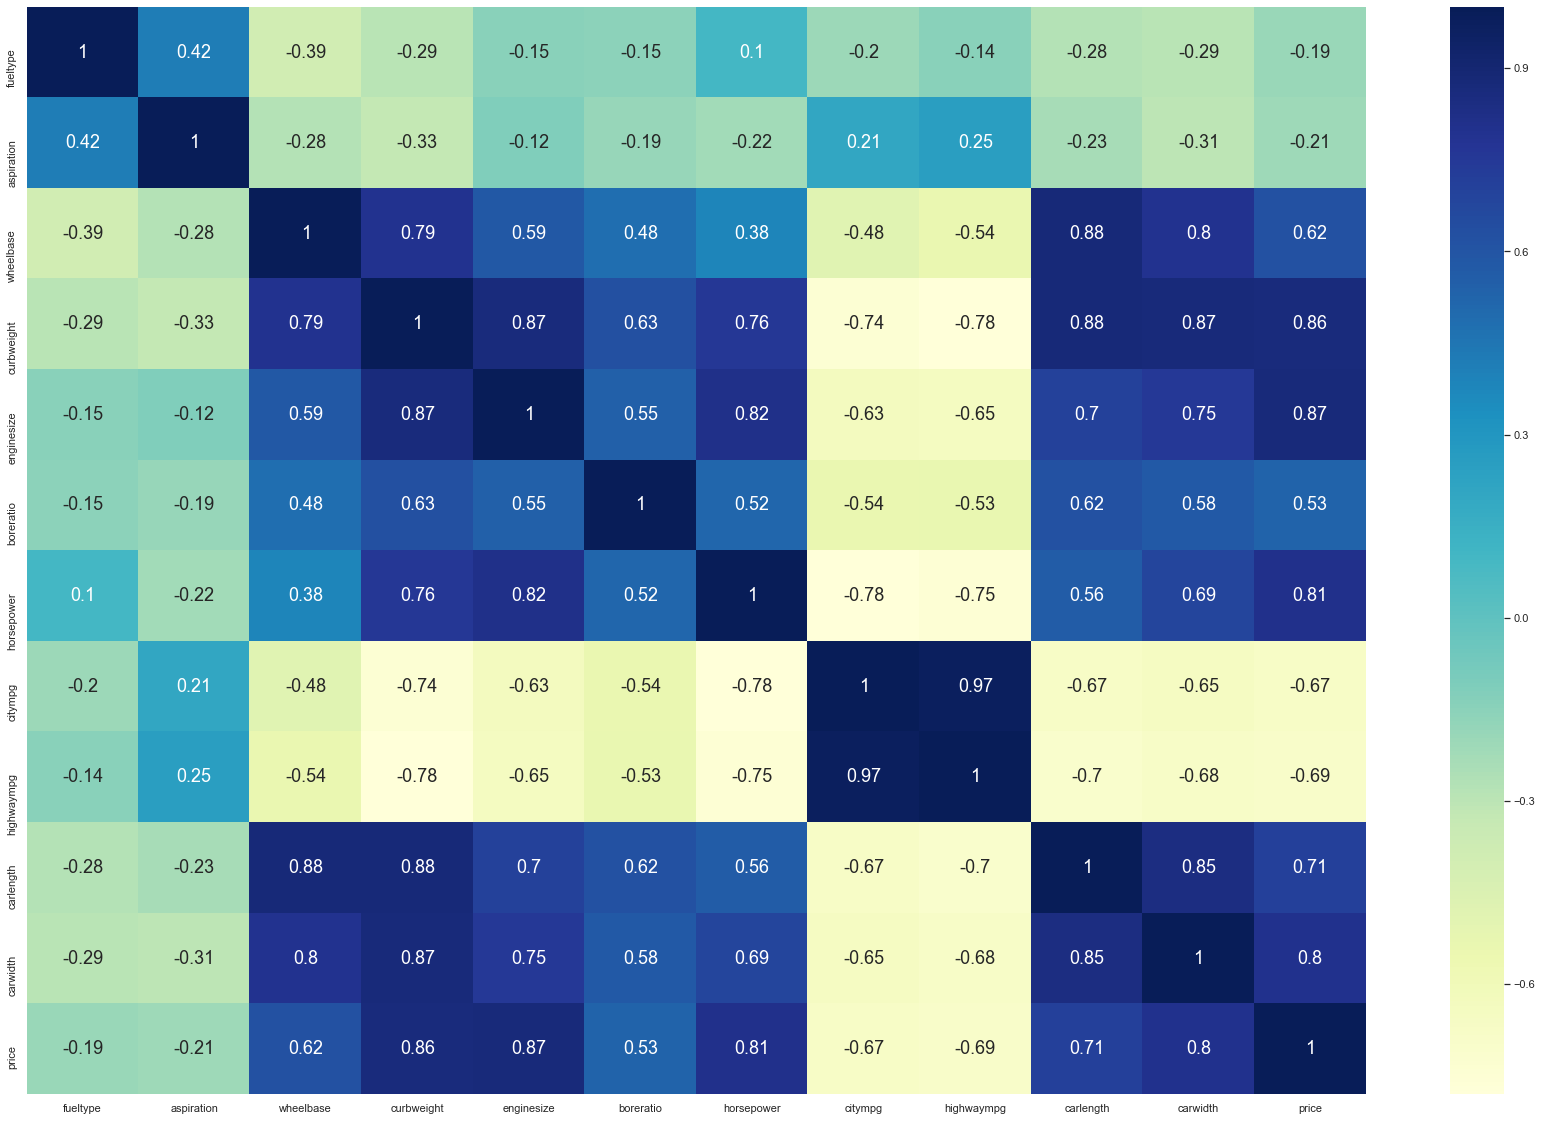

In [49]:

plt.figure(figsize = (30, 20))
data_set1 = df_train[['fueltype', 'aspiration', 'wheelbase', 'curbweight',
       'enginesize', 'boreratio', 'horsepower', 'citympg','highwaympg',
       'carlength', 'carwidth','price']]
sns.heatmap(data_set1.corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 18})
plt.show()


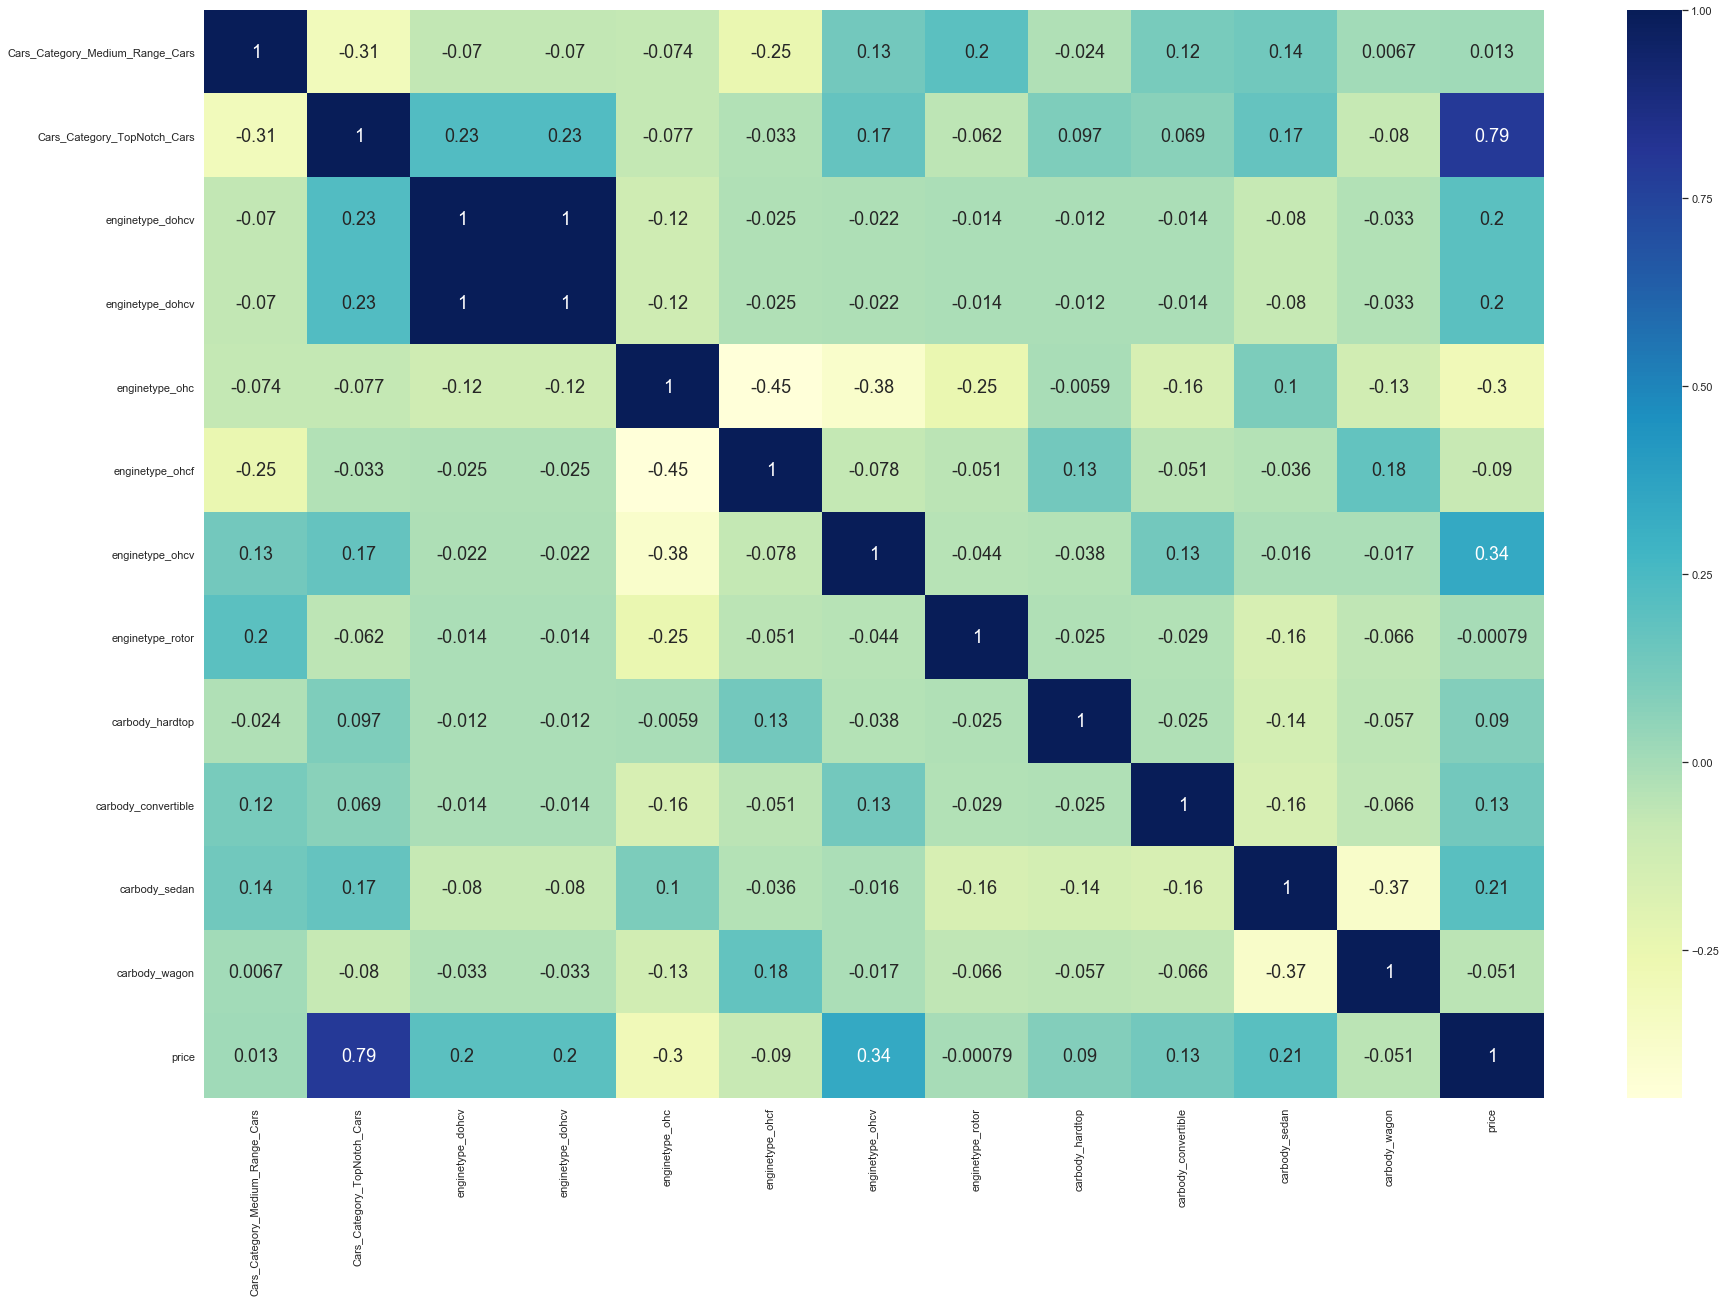

In [50]:
plt.figure(figsize = (30, 20))
data_set1 = df_train[['Cars_Category_Medium_Range_Cars',
       'Cars_Category_TopNotch_Cars', 'enginetype_dohcv', 'enginetype_dohcv',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'carbody_hardtop', 'carbody_convertible',
       'carbody_sedan', 'carbody_wagon','price']]
sns.heatmap(data_set1.corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 18})
plt.show()

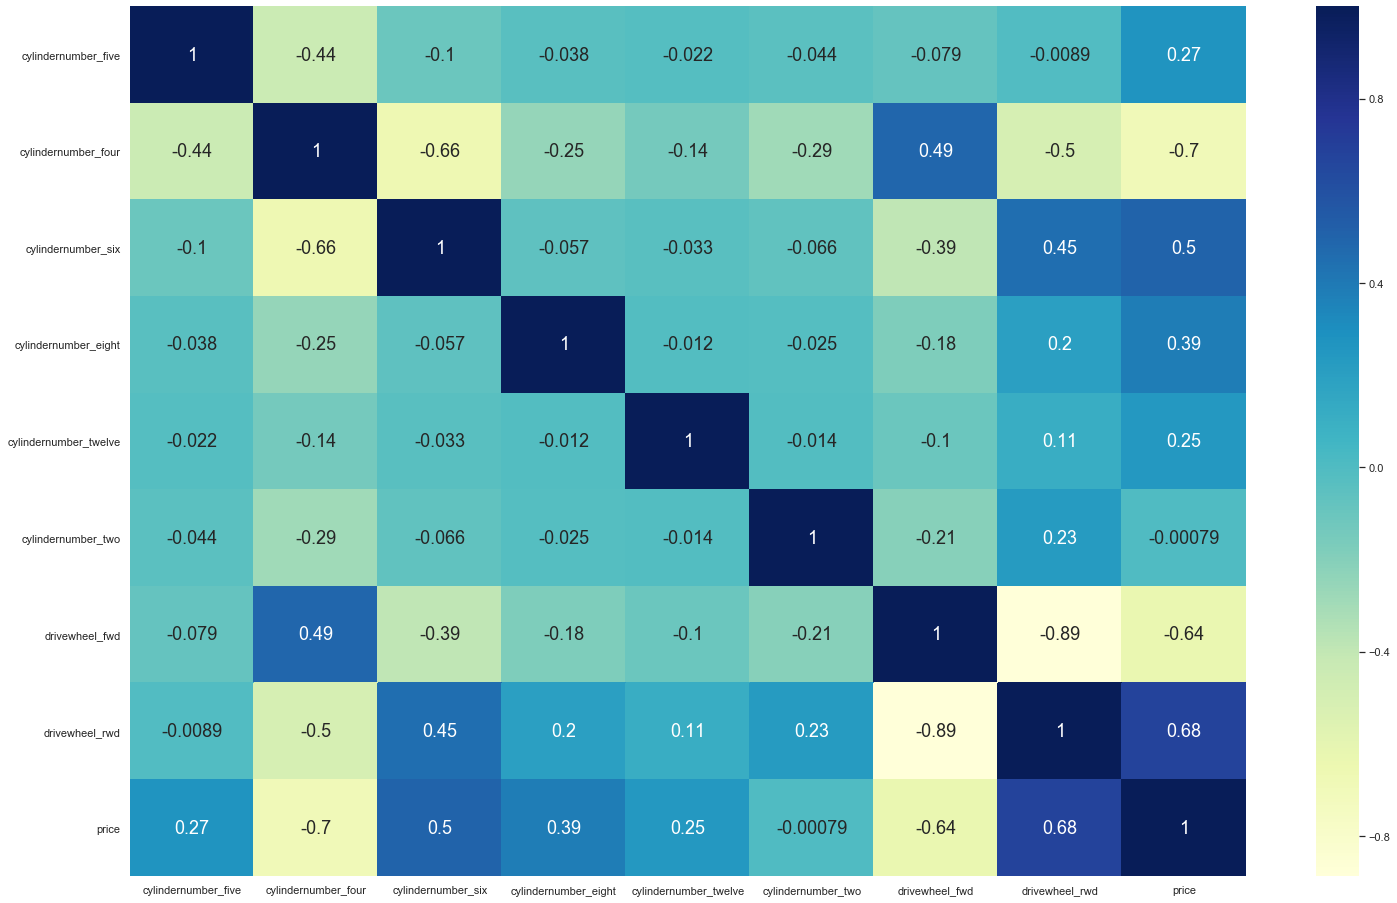

In [51]:
plt.figure(figsize = (25, 16))
data_set1 = df_train[['cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_eight',
       'cylindernumber_twelve', 'cylindernumber_two', 'drivewheel_fwd',
       'drivewheel_rwd','price']]
sns.heatmap(data_set1.corr(),annot=True,cmap="YlGnBu",annot_kws={"size": 18})
plt.show()

# Inferences 
- From above 3 heatmap charts we can see 13 variables are  high correlated with price.

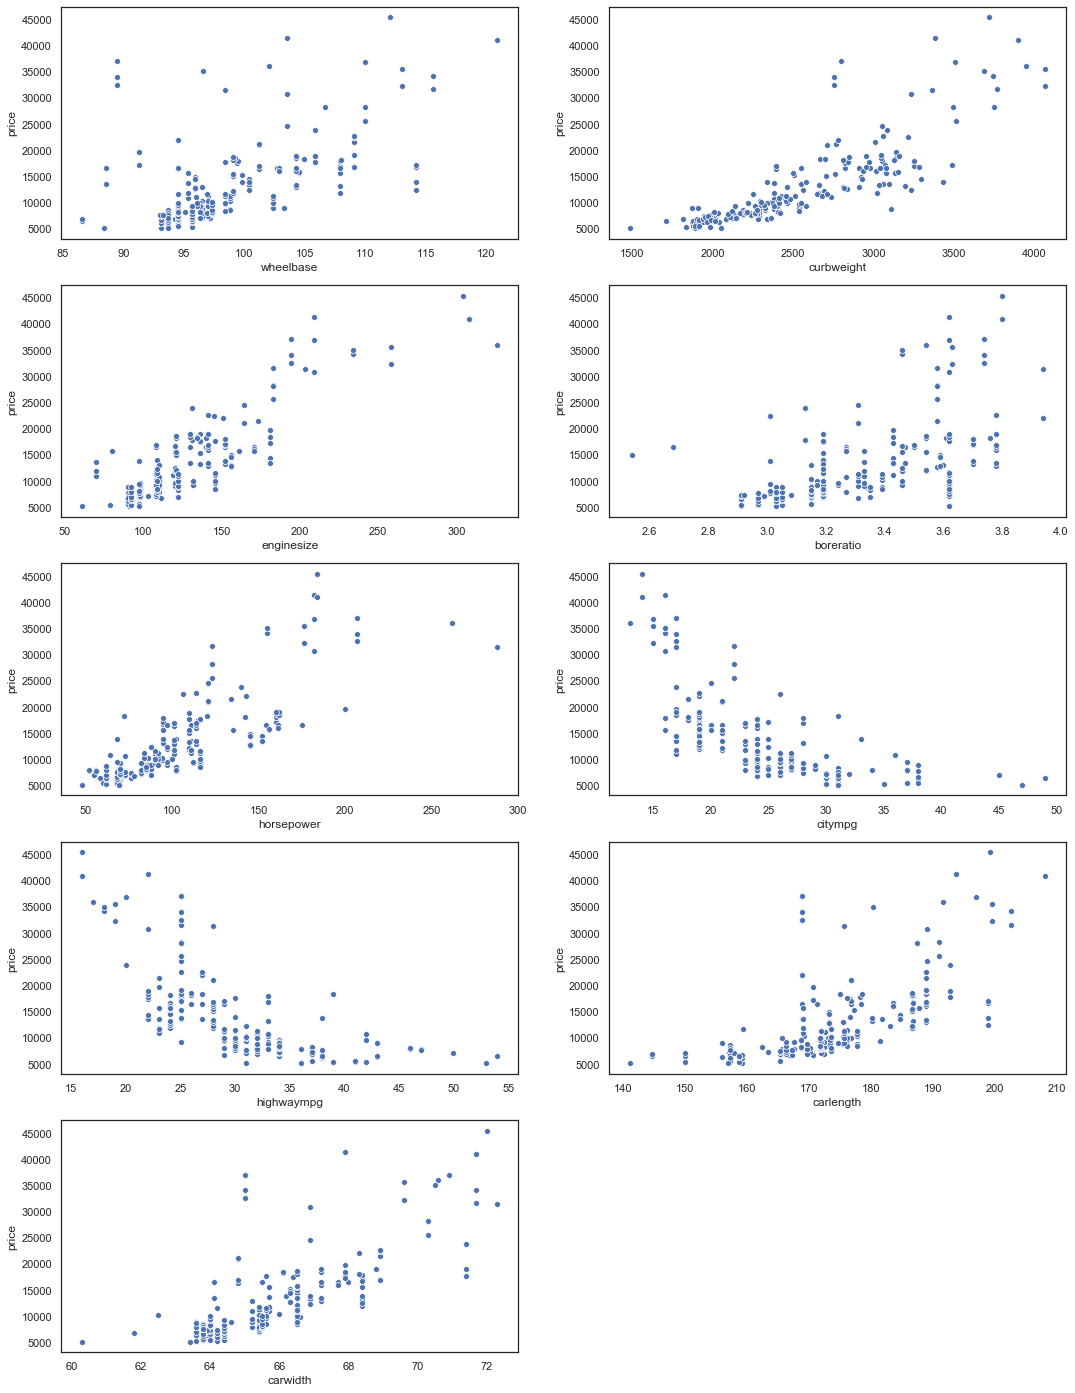

In [52]:
# Scatter plot for corelated Numerical variables
col = [ 'wheelbase', 'curbweight','enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg',
       'carlength', 'carwidth']

#Function to plot a list of categorical variables together
def scatter_plot(colname):
    plt.figure(figsize=(18, 35))
    for var in colname:
        plt.subplot(7,2,colname.index(var)+1)
        sns.scatterplot(x = var, y = 'price', data = sig_car_data)
    plt.show()
    
scatter_plot(col[:])


# Inferences 

- We can see there is line that can fit in above plots.

# Training the Model

In [53]:
y_train = df_train.pop('price')
X_train = df_train

In [54]:
print(X_train.shape)
print(y_train.shape)

(143, 31)
(143,)


## Added Functions definations for VIF

In [55]:
# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Building the Model - using bottom-up approach.


First we add the most statistical significant variable which is **enginesize.**

In [56]:
X_train_sm = sm.add_constant(X_train['enginesize'])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_sm).fit()

# Check parameters created
lr.params

const         8.673617e-17
enginesize    8.679152e-01
dtype: float64

In [57]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.09e-44
Time:                        07:51:55   Log-Likelihood:                -102.84
No. Observations:                 143   AIC:                             209.7
Df Residuals:                     141   BIC:                             215.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.042   2.07e-15      1.000      -0.083       0.083
enginesize     0.8679      0.042     20.748      0.000       0.785       0.951
==============================================================================
Omnibus:                       23.258   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.411
Skew:                           0.885   Prob(JB):                     9.16e-08
Kurtosis:                       4.520   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Inferences
With simple linear regression i.e., enginesize and price we get adjusted R square value of 75%.

### Adding 3 numerical variables 'curbweight','horsepower','carwidth' which has most statistical significant coefficient

In [58]:
X_train_1 = X_train[['enginesize','curbweight','horsepower','carwidth']]
X_train_1 = sm.add_constant(X_train_1)
lr_1 = sm.OLS(y_train, X_train_1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.91e-51
Time:                        07:51:55   Log-Likelihood:                -77.687
No. Observations:                 143   AIC:                             165.4
Df Residuals:                     138   BIC:                             180.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1245      0.449     -2.503      0.013      -2.013      -0.236
enginesize     0.3485      0.081      4.286      0.000       0.188       0.509
curbweight     0.0004      0.000      2.511      0.013    9.41e-05       0.001
horsepower     0.2167      0.063      3.448      0.001       0.092       0.341
carwidth       0.1778      0.073      2.429      0.016       0.033       0.322
==============================================================================
Omnibus:                       36.490   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.931
Skew:                           1.009   Prob(JB):                     6.61e-21
Kurtosis:                       6.394   Cond. No.                     3.32e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
getVIF(X_train_1)

,Features,VIF
0,const,160.47
2,curbweight,7.28
1,enginesize,5.26
4,carwidth,4.26
3,horsepower,3.14


# Inferences 

- After adding 3 Numerical variable, I see sudden jump in the R square value but at the same time I see some increament in P-Value for carwidth and curbweight. As p-value for carwidth is 0.016 and VIP is also 4.26 on higher end will remove carwidth and see what difference it makes in R square, VIF and P-value of predictor variables.

In [60]:
X_train_2 = X_train[['enginesize','curbweight','horsepower']]
X_train_2 = sm.add_constant(X_train_2)
lr_2 = sm.OLS(y_train, X_train_2).fit()

lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           2.16e-51
Time:                        07:51:55   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8427      0.344     -5.355      0.000      -2.523      -1.162
enginesize     0.3400      0.083      4.114      0.000       0.177       0.503
curbweight     0.0007      0.000      5.385      0.000       0.000       0.001
horsepower     0.2288      0.064      3.589      0.000       0.103       0.355
==============================================================================
Omnibus:                       25.598   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.392
Skew:                           0.751   Prob(JB):                     9.37e-13
Kurtosis:                       5.653   Cond. No.                     2.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
getVIF(X_train_2)

,Features,VIF
0,const,90.96
1,enginesize,5.25
2,curbweight,4.11
3,horsepower,3.12


## Inferences
- After removing the carwidth predictor variable there is reduction in R square but at the same time improvement in the VIF as well as P-value of other dependent variables which mean carwidth is correlated and hence it is good to be removed.
- Bassed on the earlier analysis , carheight is highly correlated with carwidth , the previous can also be ignored.

## Will add now some categorical variable and see how our Model behaves. (highwaympg)

In [62]:
X_train_3 = X_train[['enginesize','curbweight','horsepower','highwaympg']]

# Add a constant
X_train_3 = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     156.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           2.96e-50
Time:                        07:51:55   Log-Likelihood:                -80.533
No. Observations:                 143   AIC:                             171.1
Df Residuals:                     138   BIC:                             185.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9708      0.420     -4.692      0.000      -2.801      -1.140
enginesize     0.3234      0.089      3.652      0.000       0.148       0.498
curbweight     0.0008      0.000      4.709      0.000       0.000       0.001
horsepower     0.2486      0.074      3.367      0.001       0.103       0.395
highwaympg     0.0358      0.067      0.535      0.594      -0.097       0.168
==============================================================================
Omnibus:                       25.700   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.680
Skew:                           0.754   Prob(JB):                     8.12e-13
Kurtosis:                       5.659   Cond. No.                     3.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Inference 
- I see there is no change in R square value. Hence removing it. Also citympg is high correlated to highwagmpg hence not considering it also.

In [63]:
getVIF(X_train_3)

,Features,VIF
0,const,134.83
2,curbweight,6.11
1,enginesize,5.99
3,horsepower,4.17
4,highwaympg,3.44


### Adding another categorical variable (cylindernumber_four) having high negative correlation with price to see the Model behaviour.

In [64]:
X_train_4 = X_train[['enginesize','curbweight','horsepower','cylindernumber_four']]

# Add a constant
X_train_4 = sm.add_constant(X_train_4)

# Create a third fitted model
lr_4 = sm.OLS(y_train, X_train_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     178.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.66e-53
Time:                        07:51:56   Log-Likelihood:                -72.755
No. Observations:                 143   AIC:                             155.5
Df Residuals:                     138   BIC:                             170.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.3879      0.346     -4.014      0.000      -2.072      -0.704
enginesize              0.3215      0.079      4.090      0.000       0.166       0.477
curbweight              0.0007      0.000      5.220      0.000       0.000       0.001
horsepower              0.1419      0.064      2.207      0.029       0.015       0.269
cylindernumber_four    -0.4284      0.107     -4.022      0.000      -0.639      -0.218
==============================================================================
Omnibus:                       25.635   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.663
Skew:                           0.534   Prob(JB):                     2.78e-21
Kurtosis:                       6.840   Cond. No.                     2.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
getVIF(X_train_4)

,Features,VIF
0,const,101.85
1,enginesize,5.27
2,curbweight,4.15
3,horsepower,3.52
4,cylindernumber_four,1.85


# Inferences
- R2 increased substanatialy. Also not change in P-value and VIF.

### Based on the frequency distribution analysis done on categorical variables, Cars_Category_TopNotch_Cars and drivewheel_fwd were contributing heavily in change of price. Hence added these values in the model.

In [66]:
X_train_5 = X_train[['enginesize','curbweight','horsepower','drivewheel_fwd','cylindernumber_four','Cars_Category_TopNotch_Cars']]

# Add a constant
X_train_5 = sm.add_constant(X_train_5)

# Create a third fitted model
lr_5 = sm.OLS(y_train, X_train_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     229.9
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           1.29e-68
Time:                        07:51:56   Log-Likelihood:                -30.544
No. Observations:                 143   AIC:                             75.09
Df Residuals:                     136   BIC:                             95.83
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.8854      0.336     -5.618      0.000      -2.549      -1.222
enginesize                      0.0293      0.070      0.422      0.674      -0.108       0.167
curbweight                      0.0008      0.000      6.586      0.000       0.001       0.001
horsepower                      0.1772      0.049      3.631      0.000       0.081       0.274
drivewheel_fwd                 -0.0288      0.078     -0.371      0.711      -0.182       0.125
cylindernumber_four            -0.2474      0.082     -3.014      0.003      -0.410      -0.085
Cars_Category_TopNotch_Cars     1.1661      0.115     10.146      0.000       0.939       1.393
==============================================================================
Omnibus:                       38.533   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.908
Skew:                           1.114   Prob(JB):                     4.94e-20
Kurtosis:                       6.155   Cond. No.                     3.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
getVIF(X_train_5)

,Features,VIF
0,const,170.65
1,enginesize,7.33
2,curbweight,6.05
3,horsepower,3.61
4,drivewheel_fwd,2.20
6,Cars_Category_TopNotch_Cars,2.10
5,cylindernumber_four,1.96


# Inferences 
- Rsquare increased considerabily by 8% and without much impacting the Adjusted R square.
- Although I see P-value for drivewheel_fwd and enginesize is too high which need to be removedone by one.

In [68]:
X_train_5_r = X_train[['enginesize','curbweight','horsepower','cylindernumber_four','Cars_Category_TopNotch_Cars']]

# Add a constant
X_train_5_r = sm.add_constant(X_train_5_r)

# Create a third fitted model
lr_5_r = sm.OLS(y_train, X_train_5_r).fit()
lr_5_r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     277.6
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           7.86e-70
Time:                        07:51:56   Log-Likelihood:                -30.617
No. Observations:                 143   AIC:                             73.23
Df Residuals:                     137   BIC:                             91.01
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.9619      0.264     -7.426      0.000      -2.484      -1.439
enginesize                      0.0208      0.065      0.317      0.751      -0.109       0.150
curbweight                      0.0008   9.68e-05      8.165      0.000       0.001       0.001
horsepower                      0.1796      0.048      3.727      0.000       0.084       0.275
cylindernumber_four            -0.2505      0.081     -3.077      0.003      -0.411      -0.089
Cars_Category_TopNotch_Cars     1.1750      0.112     10.487      0.000       0.953       1.397
==============================================================================
Omnibus:                       38.955   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.762
Skew:                           1.118   Prob(JB):                     1.19e-20
Kurtosis:                       6.226   Cond. No.                     2.74e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### As p-value of enginesize is 0.751, hence removing it.

In [69]:
X_train_6 = X_train[['curbweight','horsepower','cylindernumber_four','Cars_Category_TopNotch_Cars']]

# Add a constant
X_train_6 = sm.add_constant(X_train_6)

# Create a third fitted model
lr_6 = sm.OLS(y_train, X_train_6).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     349.2
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           4.15e-71
Time:                        07:51:56   Log-Likelihood:                -30.669
No. Observations:                 143   AIC:                             71.34
Df Residuals:                     138   BIC:                             86.15
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0131      0.208     -9.661      0.000      -2.425      -1.601
curbweight                      0.0008   7.55e-05     10.727      0.000       0.001       0.001
horsepower                      0.1862      0.043      4.294      0.000       0.100       0.272
cylindernumber_four            -0.2494      0.081     -3.076      0.003      -0.410      -0.089
Cars_Category_TopNotch_Cars     1.1906      0.100     11.863      0.000       0.992       1.389
==============================================================================
Omnibus:                       38.857   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.524
Skew:                           1.115   Prob(JB):                     1.34e-20
Kurtosis:                       6.224   Cond. No.                     2.16e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Inferences

- After removing enginesize, no change in the R square. Good to remove it.

In [70]:
### Adding another Numerial variable wheelbase and carbody_convertible which were contributing high in price change.

In [71]:
X_train_7 = X_train[['curbweight','Cars_Category_TopNotch_Cars','horsepower','cylindernumber_four','wheelbase','carbody_convertible']]

# Add a constant
X_train_7 = sm.add_constant(X_train_7)

# Create a third fitted model
lr_7 = sm.OLS(y_train, X_train_7).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     259.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           6.96e-72
Time:                        07:51:56   Log-Likelihood:                -22.613
No. Observations:                 143   AIC:                             59.23
Df Residuals:                     136   BIC:                             79.97
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0954      0.361     -3.031      0.003      -1.810      -0.381
curbweight                      0.0004      0.000      3.217      0.002       0.000       0.001
Cars_Category_TopNotch_Cars     1.1714      0.096     12.241      0.000       0.982       1.361
horsepower                      0.2651      0.050      5.330      0.000       0.167       0.363
cylindernumber_four            -0.2693      0.077     -3.478      0.001      -0.422      -0.116
wheelbase                       0.1608      0.054      2.976      0.003       0.054       0.268
carbody_convertible             0.6324      0.167      3.782      0.000       0.302       0.963
==============================================================================
Omnibus:                       48.428   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.414
Skew:                           1.262   Prob(JB):                     2.95e-34
Kurtosis:                       7.421   Cond. No.                     3.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
getVIF(X_train_7)

,Features,VIF
0,const,221.17
1,curbweight,9.68
5,wheelbase,4.94
3,horsepower,4.19
4,cylindernumber_four,1.95
2,Cars_Category_TopNotch_Cars,1.62
6,carbody_convertible,1.29


In [73]:
X_train_8 = X_train[['Cars_Category_TopNotch_Cars','horsepower','cylindernumber_four','wheelbase','carbody_convertible']]

# Add a constant
X_train_8 = sm.add_constant(X_train_8)

# Create a third fitted model
lr_8 = sm.OLS(y_train, X_train_8).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     289.6
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           5.62e-71
Time:                        07:51:56   Log-Likelihood:                -27.858
No. Observations:                 143   AIC:                             67.72
Df Residuals:                     137   BIC:                             85.49
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.0483      0.068      0.716      0.475      -0.085       0.182
Cars_Category_TopNotch_Cars     1.2006      0.098     12.193      0.000       1.006       1.395
horsepower                      0.3795      0.036     10.550      0.000       0.308       0.451
cylindernumber_four            -0.2900      0.080     -3.636      0.000      -0.448      -0.132
wheelbase                       0.3097      0.029     10.740      0.000       0.253       0.367
carbody_convertible             0.8538      0.158      5.421      0.000       0.542       1.165
==============================================================================
Omnibus:                       36.299   Durbin-Watson:                   2.295
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.475
Skew:                           0.981   Prob(JB):                     6.82e-22
Kurtosis:                       6.536   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
getVIF(X_train_8)

,Features,VIF
0,const,7.23
2,horsepower,2.05
3,cylindernumber_four,1.93
1,Cars_Category_TopNotch_Cars,1.61
4,wheelbase,1.32
5,carbody_convertible,1.07


# Inferences 
- Now we have good Model with low PIF and low VIF value with R square as 91.4 and Adjusted R2 is 91.0
- This looks to be acceptable Model. Lets vaildate Residual Analysis


# Residual Analysis


In [75]:
y_train_pred = lr_7.predict(X_train_7)

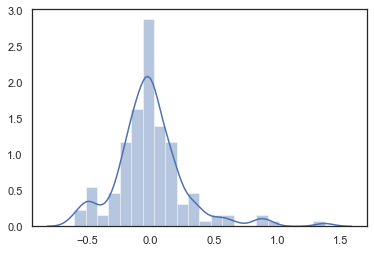

In [76]:
res = y_train - y_train_pred
sns.distplot(res)

# Inference
- The Error distribution is more close to a normal distribution and more centered at 0

# Predictions and evaluations on the Test Set
- First step is transform the test dataset.

In [77]:
# Applying the scaling on the test sets
df_test[num_col] = scaler.transform(df_test[num_col])
df_test.head()

,price,fueltype,aspiration,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,...,carbody_sedan,carbody_wagon,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
160,-0.683618,1,1,-0.475189,2094,-0.660242,-0.451443,-0.822372,1.887918,2.320526,...,1,0,0,0,1,0,0,0,1,0
186,-0.586314,1,1,-0.205872,2275,-0.390836,-0.451443,-0.443427,0.240833,0.449816,...,1,0,0,0,1,0,0,0,1,0
59,-0.541325,1,1,0.046613,2385,-0.072447,0.317543,-0.468690,0.091098,0.162014,...,0,0,0,0,1,0,0,0,1,0
165,-0.483096,1,1,-0.677177,2265,-0.660242,-0.259197,0.238673,0.091098,-0.269688,...,1,0,0,0,1,0,0,0,0,1
140,-0.700971,1,1,-0.879165,2240,-0.415328,1.201877,-0.746583,0.091098,0.018113,...,0,0,0,0,1,0,0,0,0,0


In [78]:
# Dividing test set into X_test and y_test
y_test = df_test.pop('price')
X_test = df_test
X_test = sm.add_constant(X_test)

In [79]:
X_test_new = X_test[X_train_8.columns]

# Making predictions using the final model
y_pred = lr_8.predict(X_test_new)

Text(0, 0.5, 'y_pred')

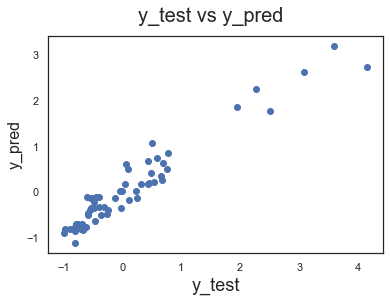

In [80]:

# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.3178604464110734
Model r2_score: 0.9126790124274486


With a low p-value and low VIF, these variables do describe the price of the automobiles to a good extent.

Final predictors which can be proposed are

- Cars_Category_TopNotch_Cars            **(coef - 1.2006, p-value - 0.000, VIF -1.61)**
- horsepower                             **(coef - 0.3795, p-value - 0.000, VIF - 2.05)**
- cylindernumber_four                    **(coef - -0.2900, p-value - 0.000, VIF -1.93)**
- wheelbase                              **(coef - 0.3097, p-value - 0.000, VIF - 1.32)**
- carbody_convertible                    **(coef - 0.8538, p-value - 0.000, VIF - 1.07)**

We can see that the equation of our best fitted line is:

    $ price = 0.0483 + (0.3097 * wheelbase) + (0.3795 * horsepower) + (0.8538 * carbody\_convertible) - (0.2900 *  cylindernumber\_four) + 1.2006* Cars\_Category\_TopNotch_Cars $

**Above equation implies how the price of the vehical changes with a unit change in any of these predictor variable with all other variables held constant.**

e.g. 
1. The predictor carbody_convertible suggest that the price of car increases by a factor of 0.8538 when the car body is convertible

2. The cylinder_number_four is the most commonly available feature (above 70%) of the car data in USA. Since having 4 cylinder is attributed with relatively low price cars the coeffeciant for this variable is negative.

3. The company brand name plays important role in determining the price the automobile. Companies like Jaguar further adds up to the price by a factor of 1.2006


Overall we have a decent model, still there are area of improvements.

<table style="width:50%">
<tr>
<th>Adj. R-squared</th>
<th>r2_score</th>
<th>Prob (F-statistic)</th>
<th>AIC</th>
<th>BIC</th>
<th>RMSE</th>
</tr>

<tr>
<td>91.0</td>
<td>0.912</td>
<td>289.6</td>
<th>67.72</th>
<th>85.49</th>
<th>0.317</th>
</tr>
</table>

We have a couple of options:

1. Add new features PWRatio = (horsepower: curbweight) etc.
2. Removing outliers or handling outlier by minmax distribution.
3. Build a non-linear model

**Suggestions:**
The chinese company Geely Automotives entering the US market should consider the below listed points,

- Average US car price: 13500 USD(approx). For profitability and effective pricing of cars in this new market, the model's price predictors variables have to be regulated and balanced effectively to meet certain price levels and gain an edge over the other competitors.

   **Key features are**
- *Horse Power*
- *cylindernumber_four*
- *wheel base*
- *carbody_convertible*
   
   Other features which are very common in other cars and can be consider while designing the car.
- **fuelType** - Gas fueled cars are more than diesel fueled cars.
- dhc is most common **engine type**.
- **enginelocation** - more than 90% of cars having front engine location
- **symboling** - Low Risk (0,1)
- **aspiration** - standard
- **doornumbers** - four
- **drivewheel** - forward
- **fuelSystem** - mpfi